In [1]:
import pandas as pd

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from feature_engine.encoding import CountFrequencyEncoder
from feature_engine.encoding import OneHotEncoder, OrdinalEncoder, RareLabelEncoder


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [5]:
df = pd.read_csv("Prueba de modelamiento para Cientifico de Datos 2023.csv", sep=';')
categorical_cols = ['fabricaAlimento', 'granja_anonym', 'genetica', 'asesor']
numerical_cols = ['pesoInicial', 'pesoFinal', 'semesreSalida', 'mortalidad']
target = "conversionAlimenticia"

In [6]:
df

,loteNo,departamento_anonym,empresa_anonym,granja_anonym,proveedorCorregido_anonym,fabricaAlimento,genetica,duracionCeba,edadFinal,edadInicial,...,pesoFinal,fechaSalida,anioSalida,semesreSalida,anioSemestreSalida,asesor,numFinalAnimales,numInicialAnimales,mortalidad,conversionAlimenticia
0,5e4604c71c555bfa922bd644,dp_0,em_0,gr_0,pn_0,pp_0,lg_0,72.00,152.00,80.00,...,103.5600,9/09/2019,2019,2,2019-S2,rt_0,220,226,2.65,2.1760
1,5e4604c71c555bfa922bd68c,dp_0,em_0,gr_0,pn_0,pp_0,lg_0,81.00,154.00,73.00,...,100.6400,23/10/2019,2019,2,2019-S2,rt_0,187,201,6.97,2.2090
2,5e4604c71c555bfa922bd6b5,dp_0,em_0,gr_0,pn_0,pp_0,lg_0,79.00,152.00,73.00,...,102.0700,19/11/2019,2019,2,2019-S2,rt_0,194,203,4.43,2.1350
3,5ea0d184cbe8d10cee382f9b,dp_0,em_0,gr_0,pn_0,pp_0,lg_0,76.00,155.00,79.00,...,114.1200,13/03/2020,2020,1,2020-S1,rt_0,203,208,2.40,2.1050
4,5ef2216bde8636c49c3b8530,dp_0,em_0,gr_0,pn_0,pp_0,lg_0,74.00,154.00,80.00,...,118.6400,1/04/2020,2020,1,2020-S1,rt_0,185,189,2.12,2.2220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520,6453f7e618bf3e15193e673b,dp_6,em_71,gr_81,pn_0,pp_2,lg_0,60.00,146.53,86.53,...,95.9700,30/03/2023,2023,1,2023-S1,rt_12,1298,1338,2.99,2.4900
2521,6455212918bf3e15197d4918,dp_3,em_63,gr_69,pn_6,pp_8,lg_0,93.19,165.16,71.97,...,122.3664,1/03/2023,2023,1,2023-S1,rt_18,645,663,2.71,2.2959
2522,6459810518bf3e1519b1d811,dp_0,em_75,gr_85,pn_0,pp_0,lg_0,83.00,155.09,72.09,...,95.8500,31/03/2023,2023,1,2023-S1,rt_0,238,243,2.06,2.0900
2523,645a406018bf3e1519de455c,dp_0,em_29,gr_30,pn_0,pp_0,lg_0,72.00,140.29,68.29,...,84.5100,6/08/2022,2022,2,2022-S2,rt_0,1007,1027,1.95,2.1400


In [7]:
data = df.loc[:, categorical_cols+numerical_cols+[target]]
data

,fabricaAlimento,granja_anonym,genetica,asesor,pesoInicial,pesoFinal,semesreSalida,mortalidad,conversionAlimenticia
0,pp_0,gr_0,lg_0,rt_0,30.9500,103.5600,2,2.65,2.1760
1,pp_0,gr_0,lg_0,rt_0,26.6100,100.6400,2,6.97,2.2090
2,pp_0,gr_0,lg_0,rt_0,28.3200,102.0700,2,4.43,2.1350
3,pp_0,gr_0,lg_0,rt_0,29.3400,114.1200,1,2.40,2.1050
4,pp_0,gr_0,lg_0,rt_0,34.0400,118.6400,1,2.12,2.2220
...,...,...,...,...,...,...,...,...,...
2520,pp_2,gr_81,lg_0,rt_12,37.6400,95.9700,1,2.99,2.4900
2521,pp_8,gr_69,lg_0,rt_18,32.6621,122.3664,1,2.71,2.2959
2522,pp_0,gr_85,lg_0,rt_0,27.7200,95.8500,1,2.06,2.0900
2523,pp_0,gr_30,lg_0,rt_0,28.0400,84.5100,2,1.95,2.1400


# Preprocesamiento

In [28]:
encoder_freq = CountFrequencyEncoder(
encoding_method="frequency",
variables=categorical_cols,
ignore_format=True,
)
encoder_max = MinMaxScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('categoricals', encoder_freq, categorical_cols),
        ('numericals', encoder_max, numerical_cols)
    ]
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

datos = df.loc[:, categorical_cols+numerical_cols]
pipeline.fit(datos)
df_transformer = pipeline.transform(datos)

df_transformer = pd.DataFrame(data=df_transformer, columns=categorical_cols+numerical_cols)

X = df_transformer

y = df["conversionAlimenticia"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train['conversionAlimenticia']= y_train
X_test['conversionAlimenticia']= y_test

In [29]:
X.to_csv("datos_transformados.csv", index=False)

# Inicialización de experimentos de regresión

In [30]:
# import pycaret regression and init setup
from pycaret.regression import *


setup_model = setup(
                data=X_train,
                target="conversionAlimenticia",
                session_id=1,
                preprocess=False,
                test_data=X_test,
                verbose=False,
                index=True,
            )


In [31]:
best = compare_models(sort="MAE", include=["gbr", "rf",  "lr", "ridge"])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:14:12
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/21 [00:00<?, ?it/s]

In [32]:
comparison_table = pull()

In [33]:
comparison_table

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.0839,0.0128,0.1127,0.4673,0.0347,0.0375,0.348
gbr,Gradient Boosting Regressor,0.0870,0.0133,0.1151,0.4447,0.0354,0.0390,0.541
lr,Linear Regression,0.1058,0.0194,0.1390,0.1890,0.0426,0.0473,0.006
ridge,Ridge Regression,0.1066,0.0197,0.1402,0.1752,0.0430,0.0477,0.006


In [34]:
comparison_table.to_csv('comparacion_modelos.csv', index=False)

In [35]:
best

RandomForestRegressor(n_jobs=-1, random_state=1)

In [36]:
import joblib

joblib.dump(best, 'best.joblib')

['best.joblib']

In [37]:
best

RandomForestRegressor(n_jobs=-1, random_state=1)

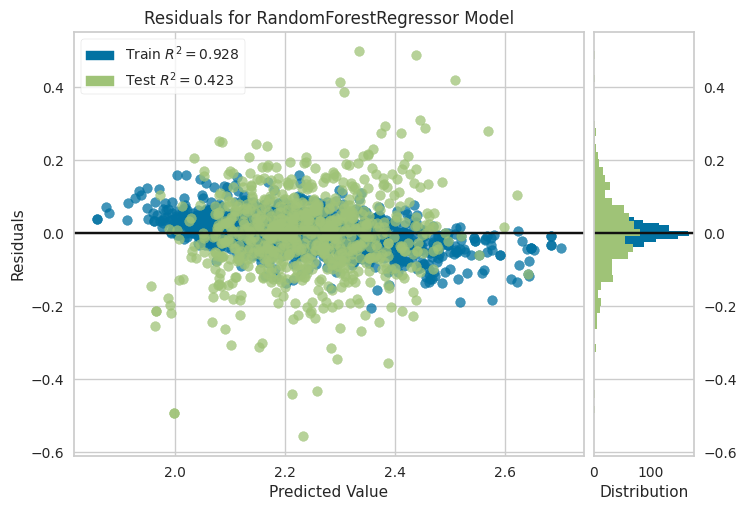

In [38]:
plot_model(best, plot = 'residuals')

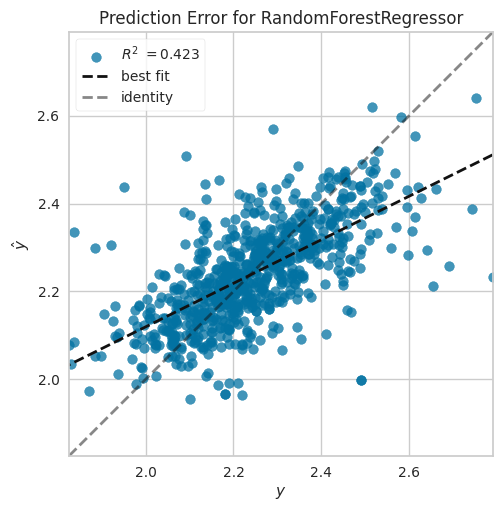

In [39]:
plot_model(best, plot = 'error')

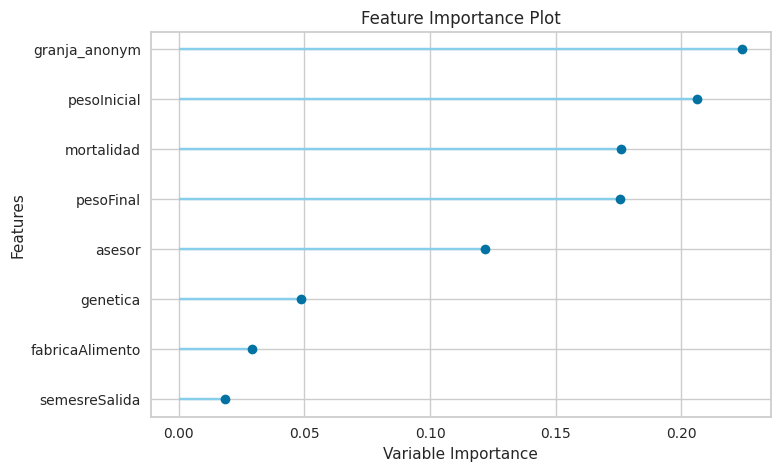

In [40]:
plot_model(best, plot = 'feature')

In [41]:
import shap
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [24]:
X_test = get_config('X_test_transformed')
y_test = get_config('y_test_transformed')

In [25]:
preds = best.predict(X_test)

In [26]:
rmse = mean_squared_error(y_test, preds, squared=False)
rmse

0.11460715107270085

# Construir sistema explicativo con SHAP

In [27]:
model = best

In [ ]:
X = pd.concat([get_config('X_test_transformed'), get_config('X_train_transformed')])


In [42]:
X

,fabricaAlimento,granja_anonym,genetica,asesor,pesoInicial,pesoFinal,semesreSalida,mortalidad
0,0.156832,0.033663,0.837228,0.090693,0.303386,0.384649,1.0,0.265
1,0.156832,0.033663,0.837228,0.090693,0.183140,0.333596,1.0,0.697
2,0.156832,0.033663,0.837228,0.090693,0.230518,0.358598,1.0,0.443
3,0.156832,0.033663,0.837228,0.090693,0.258779,0.569281,0.0,0.240
4,0.156832,0.033663,0.837228,0.090693,0.388999,0.648308,0.0,0.212
...,...,...,...,...,...,...,...,...
2520,0.087129,0.004356,0.837228,0.054653,0.488743,0.251945,0.0,0.299
2521,0.262970,0.007129,0.837228,0.121188,0.350823,0.713461,0.0,0.271
2522,0.156832,0.003564,0.837228,0.090693,0.213894,0.249847,0.0,0.206
2523,0.156832,0.017030,0.837228,0.090693,0.222760,0.051578,1.0,0.195


In [43]:
explainer = shap.Explainer(model)
shap_values = explainer(X)


In [44]:
joblib.dump(shap_values, 'shap_values.joblib')

['shap_values.joblib']

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

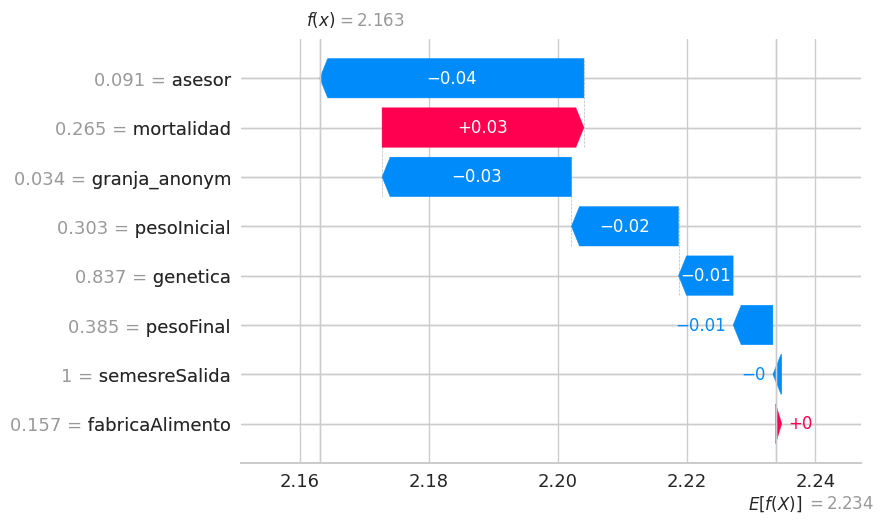

In [45]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [46]:
shap.plots.force(shap_values[0])

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

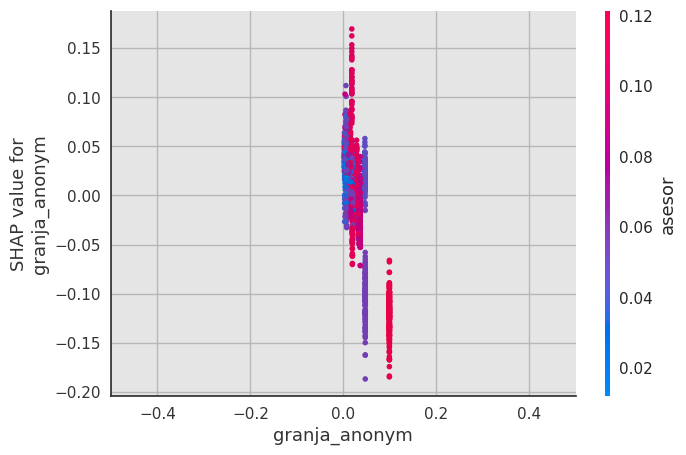

In [47]:
shap.plots.scatter(shap_values[:, "granja_anonym"], color=shap_values)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

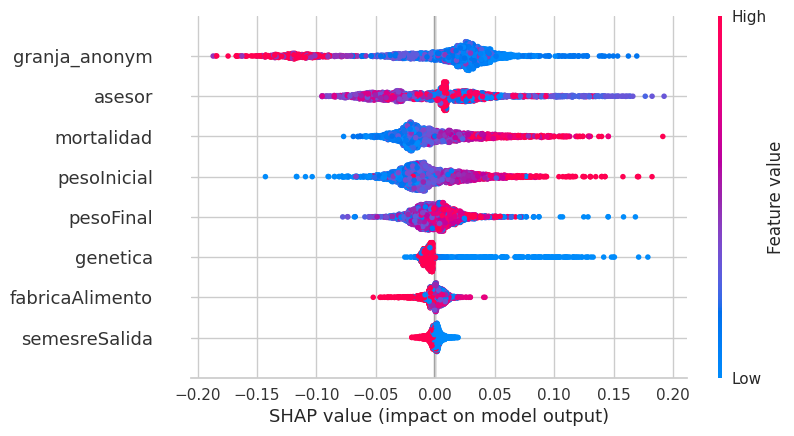

In [48]:
shap.plots.beeswarm(shap_values)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

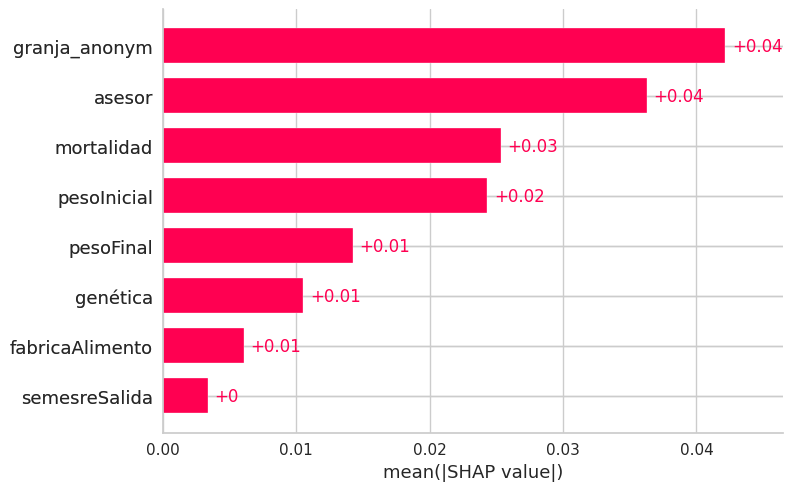

In [138]:
shap.plots.bar(shap_values)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

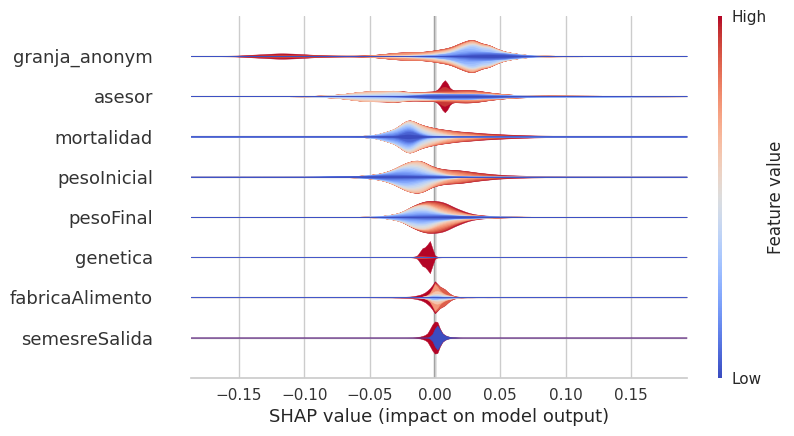

In [50]:
shap.plots.violin(shap_values, plot_type="layered_violin")

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

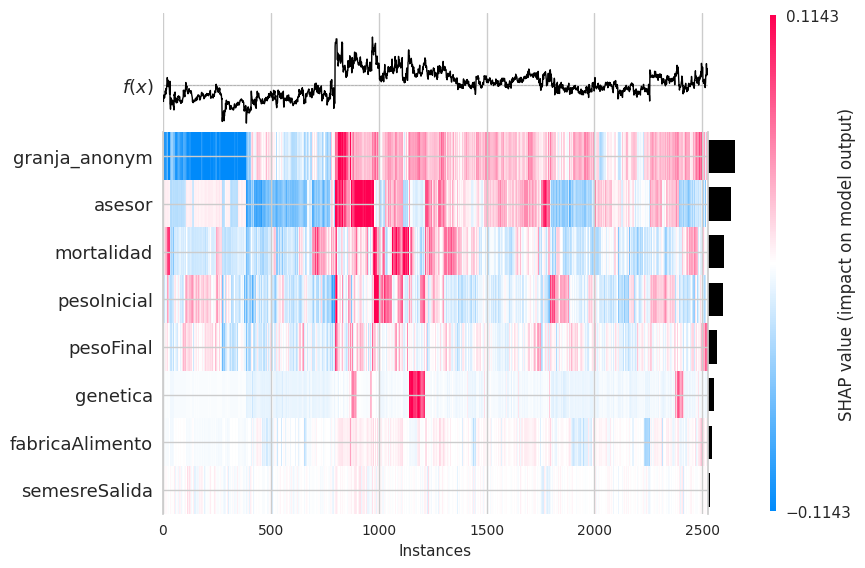

<Axes: xlabel='Instances'>

In [51]:
shap.plots.heatmap(shap_values)

In [52]:
import numpy as np

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

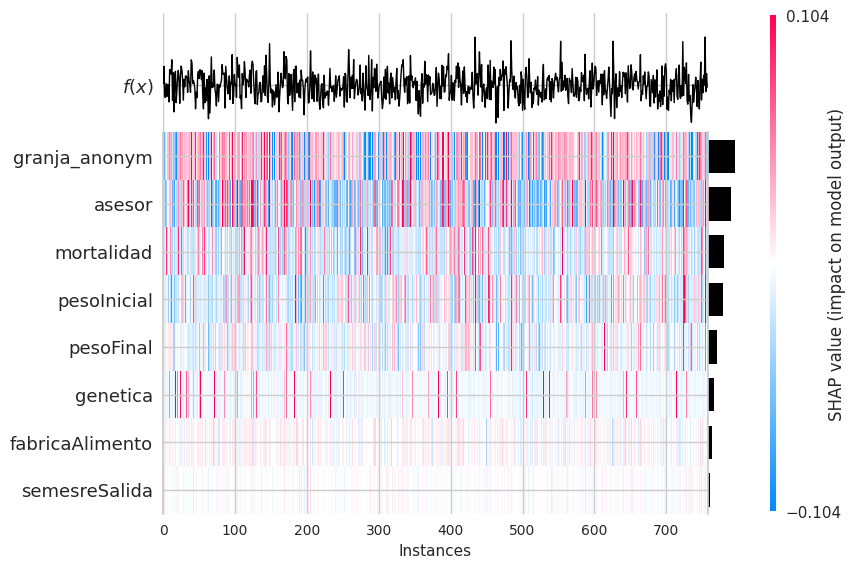

<Axes: xlabel='Instances'>

In [55]:
order = np.argsort(preds)
shap.plots.heatmap(shap_values, instance_order=order)

In [ ]:
order = np.argsort(data['shell weight'])
shap.plots.heatmap(shap_values, instance_order=order)